# Merging and Joining

## *Reading Week*  [![Open In Colab](https://github.com/oballinger/QM2/blob/main/colab-badge.png?raw=1)](https://colab.research.google.com/github/oballinger/QM2/blob/main/notebooks/RW.%20Merging%20and%20Joining.ipynb)


Sometimes, we will want to combine data from different sources about the same subject - perhaps we want to compare the GDP in a country with life expectancy, or the proportion of free schools meals with the level of unemployment.

### Aims
- Understand joins
- Work with joining dataframes in Pandas
- Create your own examples

## Downloading the Data
Let's grab the data we will need this week from our course website and save it into our data folder. If you've not already created a data folder then do so using the following command.

Don't worry if it generates an error, that means you've already got a data folder.


In [3]:
!mkdir data

In [4]:
!mkdir data/wk5
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk3/UN_Life_all.csv -o ./data/wk5/UN_Life_all.csv
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk3/UN_Cities_1214_country.csv -o ./data/wk5/UN_Cities_1214_country.csv
!curl https://s3.eu-west-2.amazonaws.com/qm2/wk3/UN_Cities_1214_population.csv -o ./data/wk5/UN_Cities_1214_population.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  354k  100  354k    0     0   318k      0  0:00:01  0:00:01 --:--:--  318k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 31445  100 31445    0     0  48344      0 --:--:-- --:--:-- --:--:-- 48302
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  373k  100  373k    0     0   357k      0  0:00:01  0:00:01 --:--:--  357k


## Joining Instructions

Joins are the combination of different datasets, and are common in relational databases as a way of performing queries. There are lots of examples of why and when we might want to do this, but most start with two tables of data. We're going to start with some data we've generated.

I'm going to go back and work with fake data for a while, because it's clean and small and we can see what's going on - when we work with real data, we have to take great care that the data is clean, the indices match, and so on.

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
%matplotlib inline


Let's create dataframes which represent fictitious values associated with people. Let's assume our data is anonymised because we're ethical researchers and don't want information about real people leaking out.

In [6]:
people1 = pd.DataFrame(5+np.random.randn(5, 5))
people1.columns = ['units of alcohol drunk','cigarettes smoked','sleep per night','height','BMI']

In [5]:
people1

,units of alcohol drunk,cigarettes smoked,sleep per night,height,BMI
0,5.749909,5.348146,4.828995,3.834791,5.211022
1,5.105580,6.224905,5.328516,5.920141,4.714227
2,5.196812,4.767412,3.897911,4.696906,2.865113
3,4.795755,4.713168,5.532171,5.381805,6.367402
4,6.053930,5.385313,2.976786,4.339825,4.761849


In [7]:
people2 = pd.DataFrame(5+np.random.randn(3, 5))
people2.columns = ['units of alcohol drunk','cigarettes smoked','sleep per night','height','BMI']

In [7]:
people2

,units of alcohol drunk,cigarettes smoked,sleep per night,height,BMI
0,5.646167,5.702980,5.075894,5.939475,3.961728
1,6.016489,4.898396,5.846025,5.648170,3.669376
2,3.840752,4.044297,4.892888,6.015289,4.462000


# Adding new observations

It looks as if we have some data about people (although we've just made it up), and a set of common measurements. It would be nice to have all of this in one place, so let's *merge* them into one dataframe. We'll use the *concat* command, which is short for *concatenate*, or "chain together".

In [8]:
people3 = pd.concat([people1,people2])

In [10]:
people3

,units of alcohol drunk,cigarettes smoked,sleep per night,height,BMI
0,5.749909,5.348146,4.828995,3.834791,5.211022
1,5.105580,6.224905,5.328516,5.920141,4.714227
2,5.196812,4.767412,3.897911,4.696906,2.865113
3,4.795755,4.713168,5.532171,5.381805,6.367402
4,6.053930,5.385313,2.976786,4.339825,4.761849
0,5.646167,5.702980,5.075894,5.939475,3.961728
1,6.016489,4.898396,5.846025,5.648170,3.669376
2,3.840752,4.044297,4.892888,6.015289,4.462000


### What is the problem above?

In [9]:
people4 = pd.concat([people1,people2], ignore_index=True)

In [12]:
people4

,units of alcohol drunk,cigarettes smoked,sleep per night,height,BMI
0,5.749909,5.348146,4.828995,3.834791,5.211022
1,5.105580,6.224905,5.328516,5.920141,4.714227
2,5.196812,4.767412,3.897911,4.696906,2.865113
3,4.795755,4.713168,5.532171,5.381805,6.367402
4,6.053930,5.385313,2.976786,4.339825,4.761849
5,5.646167,5.702980,5.075894,5.939475,3.961728
6,6.016489,4.898396,5.846025,5.648170,3.669376
7,3.840752,4.044297,4.892888,6.015289,4.462000


`ignore_index` is very useful when we want a new DataFrame which only contains data from other DataFrames, but unrelated otherwise.

## Data with a unique index: adding new observations

Let's now examine data where the elements of study are not anonymous. Let's consider that we have some city data. If we have city names (or equivalent) in the index column, simply concatenating them would be fine, because the names would not repeat in the way the index has above.

In [10]:
df1 = pd.DataFrame(5+np.random.randn(5, 5))
df1.columns = ['area','population','mean temperature','elevation','annual rainfall']
df1.index = ['London', 'Paris', 'Beijing', 'Medellin', 'Port Elizabeth']

In [ ]:
df1

,area,population,mean temperature,elevation,annual rainfall
London,4.150726,6.091615,5.638999,4.033120,5.312239
Paris,6.406381,5.192887,5.165797,4.642474,5.776229
Beijing,5.300187,4.790422,5.425208,4.857182,4.830031
Medellin,5.248481,4.734017,4.762919,5.325021,4.415028
Port Elizabeth,3.663045,5.555412,5.418251,4.369018,5.411102


In [11]:
df2 = pd.DataFrame(5+np.random.randn(3, 5))
df2.columns = ['area','population','mean temperature','elevation','annual rainfall']
df2.index = ['Mumbai', 'Sydney', 'Boston']

In [ ]:
df2

,area,population,mean temperature,elevation,annual rainfall
Mumbai,7.023555,4.045827,4.536805,5.383593,5.707156
Sydney,5.444850,4.930251,3.803988,5.578729,6.248074
Boston,3.380747,3.468165,4.166799,4.950791,5.094166


In [12]:
df3 = pd.concat([df1,df2])

In [16]:
df3

,area,population,mean temperature,elevation,annual rainfall
London,6.747396,3.814014,5.076994,4.961413,5.871723
Paris,5.373068,3.896702,6.148691,6.475878,4.990011
Beijing,5.309347,4.637276,6.977106,5.093362,4.919471
Medellin,4.770250,4.406185,4.074701,5.359688,4.229630
Port Elizabeth,3.805070,5.622870,6.664002,6.402258,7.158379
Mumbai,4.937377,5.619330,5.753935,4.947879,5.031262
Sydney,3.832572,6.242171,5.967177,4.509217,5.176892
Boston,4.141190,5.171294,5.648599,7.119805,6.503593


## Exercise: Concat continued

Repeat the above for fictitious values for New York, Tokyo, Manila and Budapest - concatenate into a new dataframe "df".

In [13]:
df4 = pd.DataFrame(5+np.random.randn(4, 5))
df4.columns = ['area','population','mean temperature','elevation','annual rainfall']
df4.index = ['New York', 'Tokyo', 'Manila','Budapest']
print(df4)

df=pd.concat([df3,df4])
print(df)

              area  population  mean temperature  elevation  annual rainfall
New York  3.640278    3.360319          4.051906   6.426207         4.778684
Tokyo     6.448726    5.310621          5.114038   4.785440         5.586029
Manila    4.684664    4.668947          6.988583   5.854644         4.118624
Budapest  4.346648    3.735891          4.493141   4.588458         4.128283
                    area  population  mean temperature  elevation  \
London          6.469804    4.757801          5.803434   4.162364   
Paris           4.506420    4.077605          5.363346   6.394666   
Beijing         3.528404    5.616827          4.620840   5.079760   
Medellin        3.508007    4.587759          4.618715   4.833516   
Port Elizabeth  4.220656    3.974168          4.558203   5.684510   
Mumbai          5.136522    3.576616          4.701506   4.734706   
Sydney          5.494650    3.808288          3.263754   5.001499   
Boston          5.423503    5.874651          4.277914   4.3356

## Combining on Attributes

What if we're looking at the same locations but different attributes? Consider the same df1

In [14]:
df1 = pd.DataFrame(5+np.random.randn(5, 5))
df1.columns = ['area','population','mean temperature','elevation','annual rainfall']
df1.index = ['London', 'Paris', 'Beijing', 'Medellin', 'Port Elizabeth']

In [22]:
df1

,area,population,mean temperature,elevation,annual rainfall
London,5.173064,4.110485,4.009219,4.317783,5.312034
Paris,5.483735,3.664524,5.758207,4.456534,5.408385
Beijing,4.018230,3.555353,4.959994,5.548254,4.121469
Medellin,4.233089,5.167690,5.321096,5.980026,4.958264
Port Elizabeth,5.336140,4.863631,5.778283,3.202519,4.139518


But a new dataframe df4, which details the same locations, but has different information about them:

In [15]:
df4 = pd.DataFrame(5+np.random.randn(5, 3))
df4.columns = ['Mean House Price', 'median income','walkability score']
df4.index = ['London', 'Paris', 'Beijing', 'Medellin', 'Port Elizabeth']

In [24]:
df4

,Mean House Price,median income,walkability score
London,5.379435,6.370631,5.167317
Paris,5.518827,5.209915,6.135811
Beijing,6.502856,5.080349,4.517224
Medellin,5.194052,4.853658,4.622217
Port Elizabeth,5.199186,5.296956,5.069501


We have to join "on" the index - meaning when merging the records, python will look at the index column.

In [16]:
df_joined = df1.merge(df4, left_index=True, right_index=True)

In [26]:
df_joined

,area,population,mean temperature,elevation,annual rainfall,Mean House Price,median income,walkability score
London,5.173064,4.110485,4.009219,4.317783,5.312034,5.379435,6.370631,5.167317
Paris,5.483735,3.664524,5.758207,4.456534,5.408385,5.518827,5.209915,6.135811
Beijing,4.018230,3.555353,4.959994,5.548254,4.121469,6.502856,5.080349,4.517224
Medellin,4.233089,5.167690,5.321096,5.980026,4.958264,5.194052,4.853658,4.622217
Port Elizabeth,5.336140,4.863631,5.778283,3.202519,4.139518,5.199186,5.296956,5.069501


Note that this joins on the *index*, not the row number - so if the order of elements in df4 is different, it should still work.

In [17]:
df4 = pd.DataFrame(np.random.randn(5, 3))
df4.columns = ['Mean House Price', 'median income','walkability score']
df4.index = ['Paris','Port Elizabeth', 'Beijing', 'Medellin', 'London']

In [28]:
df1

,area,population,mean temperature,elevation,annual rainfall
London,5.173064,4.110485,4.009219,4.317783,5.312034
Paris,5.483735,3.664524,5.758207,4.456534,5.408385
Beijing,4.018230,3.555353,4.959994,5.548254,4.121469
Medellin,4.233089,5.167690,5.321096,5.980026,4.958264
Port Elizabeth,5.336140,4.863631,5.778283,3.202519,4.139518


In [29]:
df4

,Mean House Price,median income,walkability score
Paris,2.043042,0.152343,0.199731
Port Elizabeth,0.883447,0.345262,-1.176005
Beijing,0.534924,0.829823,0.198005
Medellin,-0.386555,-1.263222,0.163905
London,0.718520,-0.604273,0.730479


In [18]:
df_joined = df1.merge(df4, left_index=True, right_index=True)

In [31]:
df_joined

,area,population,mean temperature,elevation,annual rainfall,Mean House Price,median income,walkability score
London,5.173064,4.110485,4.009219,4.317783,5.312034,0.718520,-0.604273,0.730479
Paris,5.483735,3.664524,5.758207,4.456534,5.408385,2.043042,0.152343,0.199731
Beijing,4.018230,3.555353,4.959994,5.548254,4.121469,0.534924,0.829823,0.198005
Medellin,4.233089,5.167690,5.321096,5.980026,4.958264,-0.386555,-1.263222,0.163905
Port Elizabeth,5.336140,4.863631,5.778283,3.202519,4.139518,0.883447,0.345262,-1.176005


## Merge Records
Consider now a case where we have data for some but not all cities; so df1 stil has data for these 5 cities:

In [32]:
df1

,area,population,mean temperature,elevation,annual rainfall
London,5.173064,4.110485,4.009219,4.317783,5.312034
Paris,5.483735,3.664524,5.758207,4.456534,5.408385
Beijing,4.018230,3.555353,4.959994,5.548254,4.121469
Medellin,4.233089,5.167690,5.321096,5.980026,4.958264
Port Elizabeth,5.336140,4.863631,5.778283,3.202519,4.139518


But our new table, df5, contains data for three cities:

In [19]:
df5 = pd.DataFrame(5+np.random.randn(3, 3))
df5.columns = ['Mean House Price', 'median income','walkability score']
df5.index = ['London', 'Paris', 'Glasgow']

In [ ]:
df5

,Mean House Price,median income,walkability score
London,4.848734,6.598818,5.442444
Paris,5.294294,4.282418,5.741057
Glasgow,5.375804,4.697775,4.393675


## Exercise:

How many cities appear in:
- both dataframes
- only df1
- only df5
- neither df1 nor df5?

In [34]:
#2 cities (London, Paris) appear in both
#3 cities (Beiing, Medellin, Port Elizabeth) appears in ONLY df1
#1 city (Glasgow) appears in ONLY df5
#over 10,000 cities appear in neither df1 nor df5

## Way Back Venn

What is the mechanism for joining data where these mismatches exist? Well, there are several, starting with the...

## Inner Join:

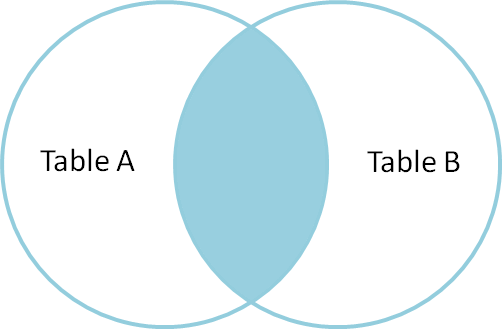

In [35]:
from IPython.display import Image

data_path = "https://s3.eu-west-2.amazonaws.com/qm2/wk3/inner.png"
Image(data_path)

(Image from http://blog.codinghorror.com/a-visual-explanation-of-sql-joins/)

The inner join *only* includes data whose index appears in both tables. Let's see what that looks like:

In [36]:
df_joined = df1.merge(df5, left_index=True, right_index=True)

In [ ]:
df_joined

,area,population,mean temperature,elevation,annual rainfall,Mean House Price,median income,walkability score
London,4.898594,6.625739,3.587877,6.063331,4.342769,4.848734,6.598818,5.442444
Paris,6.032702,3.479265,2.383832,5.251509,5.158178,5.294294,4.282418,5.741057


Here, we have a couple of arguments specifying the manner of the join - we have specified that we are joining on the index of the left and right dataset with the optional "left_index=True" and "right_index=True". Less obviously, the **left** dataset is df1 (because we're using *df1.merge()* and the **right** dataset is df5 (because it appears as an argument in merge(). There's no special reason it shouldn't be the other way around, but for this function, it is this way around and we need to remember that when we use it.

## Inner Space

Although we haven't specified it, the merge() function has defaulted to an inner join (like the diagram above). We can specify how the join is calculated by changing the text in the optional argument "how":

In [37]:
df_joined = df1.merge(df5, left_index=True, right_index=True, how='inner')

In [ ]:
df_joined

,area,population,mean temperature,elevation,annual rainfall,Mean House Price,median income,walkability score
London,4.898594,6.625739,3.587877,6.063331,4.342769,4.848734,6.598818,5.442444
Paris,6.032702,3.479265,2.383832,5.251509,5.158178,5.294294,4.282418,5.741057


## The Future of The Left
The *left* join includes **all** rows where the index appears on the **left** hand side of the join, and **any** data which **matches** it on the **right** hand side. If the index appears on the left but not the right, it will include the data from the left table, and have blanks for the columns on the right.

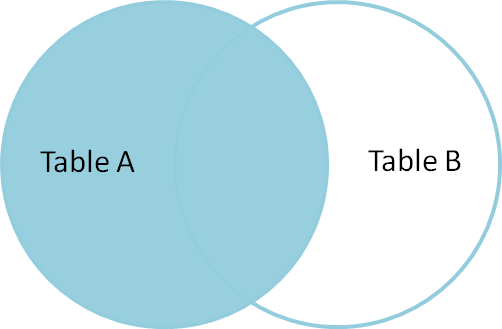

In [ ]:
data_path = "https://s3.eu-west-2.amazonaws.com/qm2/wk3/left.png"
Image(data_path)

What does *this* look like? We will use the *how='left'* optional argument to create a left join:

In [38]:
df_joined = df1.merge(df5, left_index=True, right_index=True, how='left')

In [ ]:
df_joined

,area,population,mean temperature,elevation,annual rainfall,Mean House Price,median income,walkability score
London,4.898594,6.625739,3.587877,6.063331,4.342769,4.848734,6.598818,5.442444
Paris,6.032702,3.479265,2.383832,5.251509,5.158178,5.294294,4.282418,5.741057
Beijing,4.368419,4.993774,2.942992,3.761624,6.002863,NaN,NaN,NaN
Medellin,7.437921,5.228150,3.902431,4.437361,5.563400,NaN,NaN,NaN
Port Elizabeth,7.053265,5.936734,5.842155,6.042136,7.057592,NaN,NaN,NaN


As we see, the missing data appears as **NaN** - Not a Number.

## Exercise:

Carry out *right* and *outer* joins on the dataframes df1 and df5 and explain how they're filtering and joining the data.

In [23]:
df_joined = df1.merge(df5, left_index=True, right_index=True, how='right')
df_joined.head()

#right join: contains data for attributes from both data frames only for indexes in both data frames (inner join), also contains data for attributes from right data frame (df5) only for index (Glasgow) in right data frame

,area,population,mean temperature,elevation,annual rainfall,Mean House Price,median income,walkability score
London,3.221176,5.742986,3.949259,4.167575,4.100640,3.283748,5.038756,6.230242
Paris,5.062145,5.208180,5.061722,3.521319,4.736735,4.175074,4.260342,5.251750
Glasgow,NaN,NaN,NaN,NaN,NaN,4.775189,4.167714,5.692893


In [24]:
df_joined = df1.merge(df5, left_index=True, right_index=True, how='outer')
df_joined.head()

#outer join: contains data for attributes from both data frames only for indexes in both data frames (inner join), also contains data for attributes from right data frame (df5) only for index (Glasgow) in right data frame, and data for attributes from the left dataframe only for the indexes in the left data frame

,area,population,mean temperature,elevation,annual rainfall,Mean House Price,median income,walkability score
Beijing,5.729455,5.216709,4.123544,6.095781,7.226434,NaN,NaN,NaN
Glasgow,NaN,NaN,NaN,NaN,NaN,4.775189,4.167714,5.692893
London,3.221176,5.742986,3.949259,4.167575,4.100640,3.283748,5.038756,6.230242
Medellin,4.878613,4.859048,4.469845,5.204898,5.703441,NaN,NaN,NaN
Paris,5.062145,5.208180,5.061722,3.521319,4.736735,4.175074,4.260342,5.251750


## I Am The One and Only

So far, we've carried out joins on data which have a *one-to-one* relationship; data for cities or people. What if our data has a *one-to-many* correspondence?

*Example:* We want to look at the quality of life in cities (a real student project from 2014). We have a dataset listing city-level characteristics for a number of cities in Europe, including the country each city is in. We also have a dataset listing the GDP, life expectancy and other indicators for a number of *countries* in Europe. How do we create a dataframe which, for each city, lists all of the characteristics of a city and those of its parent country?

We'll be working now with data from the UN, covering information about cities - real data this time. The UN has some great data, we've taken some from here and processed it in various ways:

http://data.un.org/Data.aspx?d=POP&f=tableCode%3A240

Let's load up data on city population - this set contains data for 2012-2014 inclusive:

In [25]:
data_path = "data/wk5/UN_Cities_1214_population.csv"

city_pop = pd.read_csv(data_path, encoding='latin1')

In [26]:
city_pop.head()

,Year,Area,Sex,City,City type,Record Type,Reliability,Source Year,Value,Value Footnotes
0,2013,Total,Both Sexes,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2014,11370.0,NaN
1,2013,Total,Male,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2014,5445.0,NaN
2,2013,Total,Female,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2014,5925.0,NaN
3,2012,Total,Both Sexes,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2013,11304.5,NaN
4,2012,Total,Male,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2013,5408.0,NaN


## Exercise

There is a another datafile we downloaded called *UN_Cities_1214_country.csv*. This is saved to `data/wk5/UN_Cities_1214_country.csv` - Load this into a dataframe called *city_c* with the city name as the index and view it; then, using *merge* on city name with city_pop to create a new dataframe called *cities*. You'll probably get some errors. google the error messages, or ask ChatGPT/Gemini to help you understand them.

**Hints:**
You'll notice that the index **won't** be the column you want to merge on in the city_pop data. What column *should* you merge on in city_pop? Which column should you merge on in city_c?

The syntax for merging on a **column** (which is not the index) is to pass the column name to the optional 'left_on=' or 'right_on=' arguments. And we don't use right_index=True (or left_index=True), depending on which we're using.

So for example: **df1.merge(df2, left_on='Name', right_index=True)** would join df1 (on the left) to df2 (on the right), using the column 'Name' on the left (df1) and the index column (whatever that is) on the right (df2).

In [41]:
data_path = "data/wk5/UN_Cities_1214_country.csv"
city_c = pd.read_csv(data_path, encoding='latin1')
city_c = city_c.set_index('City')
print(city_c)

#cities = city_pop.merge(city_c, left_index=True, right_index=True) #empty df
cities = city_pop.merge(city_c, left_on='City', right_index= True)

cities.head()

                              Country or Area
City                                         
MARIEHAMN                      íland Islands
Bahí_a Blanca-Cerri                 Argentina
BUENOS AIRES                        Argentina
Catamarca                           Argentina
Comodoro Rivadavia-Rada Tilly       Argentina
...                                       ...
Bulawayo                             Zimbabwe
Chitungwiza                          Zimbabwe
Gweru                                Zimbabwe
HARARE                               Zimbabwe
Mutare                               Zimbabwe

[1230 rows x 1 columns]


,Year,Area,Sex,City,City type,Record Type,Reliability,Source Year,Value,Value Footnotes,Country or Area
0,2013,Total,Both Sexes,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2014,11370.0,NaN,íland Islands
1,2013,Total,Male,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2014,5445.0,NaN,íland Islands
2,2013,Total,Female,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2014,5925.0,NaN,íland Islands
3,2012,Total,Both Sexes,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2013,11304.5,NaN,íland Islands
4,2012,Total,Male,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2013,5408.0,NaN,íland Islands


## A footnote about footnotes

Just a quick note - if you look at the primary UN data, you'll see footnotes which will confuse the hell out of Pandas. I've taken the footnotes out, but you can use .tail() to see whether there's any junk in the trunk, and remove it via a text editor.

## Clean data
We need to simplify this data a bit in the following ways:

1. I'm going to focus on one year (2012)
2. I'm going to just look at "Both Sexes" (not focus on one gender)
3. I'm going to get rid of a column of data (the 'Value Footnotes' column) using the *drop()* method.

In [42]:
cities = cities[cities['Sex']=='Both Sexes']
cities = cities[cities['Year']==2012]
cities.drop('Value Footnotes', axis=1, inplace=True)

In [43]:
cities.head()

,Year,Area,Sex,City,City type,Record Type,Reliability,Source Year,Value,Country or Area
3,2012,Total,Both Sexes,MARIEHAMN,City proper,Estimate - de jure,"Final figure, complete",2013,11304.5,íland Islands
34,2012,Total,Both Sexes,BUENOS AIRES,Urban agglomeration,Estimate - de facto,"Final figure, complete",2012,13242375.0,Argentina
35,2012,Total,Both Sexes,Catamarca,Urban agglomeration,Estimate - de facto,"Final figure, complete",2012,212174.0,Argentina
36,2012,Total,Both Sexes,Comodoro Rivadavia-Rada Tilly,Urban agglomeration,Estimate - de facto,"Final figure, complete",2012,145475.0,Argentina
37,2012,Total,Both Sexes,Concordia,Urban agglomeration,Estimate - de facto,"Final figure, complete",2012,155905.0,Argentina


## Extension: In My Place

The command I used to get rid of that column is *cities.drop('Value Footnotes', axis=1, inplace=True)*. The syntax is not so complex - the first argument, *'Value Footnotes'*, is just the name of the column; the second argument,  *axis=1*, tells Pandas to look for a column to remove (instead of a row which has *axis=0*); the third and final argument, *inplace=True*, is a command that tells Pandas to edit *inplace*, i.e. to edit the dataframe (*cities*) directly. When *inplace* is False (the default), this command does not directly edit cities, but instead provide an output. So the syntax for that would be

new_cities = cities.drop('Value Footnotes', axis=1)

and new_cities would be a version of *cities* without the offending column. This is usually the safer option.

## Life, Oh Life

The UN also has useful data by country, so let's try and work with some of that and join it up with our city data. Let's work with Life Expectancy Data:

http://data.un.org/Data.aspx?d=WDI&f=Indicator_Code%3ASP.DYN.LE00.IN

In [44]:
life = pd.read_csv('https://s3.eu-west-2.amazonaws.com/qm2/wk3/UN_Life_all.csv', index_col=0)

In [45]:
life.head()

,Year,Value,Value Footnotes
Country or Area,,,
Afghanistan,2012,60.509122,NaN
Afghanistan,2011,60.065366,NaN
Afghanistan,2010,59.600098,NaN
Afghanistan,2009,59.112341,NaN
Afghanistan,2008,58.607098,NaN


## Exercise:

In a new cell, clean up the above dataframe by

- removing the "Value Footnotes" Column
- use only the most recent data (2012)

In [46]:
life = life[life['Year']==2012]
life.drop('Value Footnotes', axis=1, inplace=True)
life.head()

<ipython-input-46-9f73b575c291>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  life.drop('Value Footnotes', axis=1, inplace=True)


,Year,Value
Country or Area,,
Afghanistan,2012,60.509122
Albania,2012,77.350463
Algeria,2012,70.882171
Angola,2012,51.464000
Antigua and Barbuda,2012,75.665317


Let's make it a little clearer what "Value" refers to, by renaming the column. This is one way to do that:

In [47]:
life.rename(columns={'Value':'Life Expectancy'}, inplace=True)

In [48]:
life.head()

,Year,Life Expectancy
Country or Area,,
Afghanistan,2012,60.509122
Albania,2012,77.350463
Algeria,2012,70.882171
Angola,2012,51.464000
Antigua and Barbuda,2012,75.665317


Now, merge this data with the cities data to show life expectancy for each city (based on the country it is in), and show the first 5 rows.

Plot population against life expectancy. Use plot's *optional arguments* to specify the x column, y column, and that kind='scatter'.

Question: How much data was "missing" in the merge?

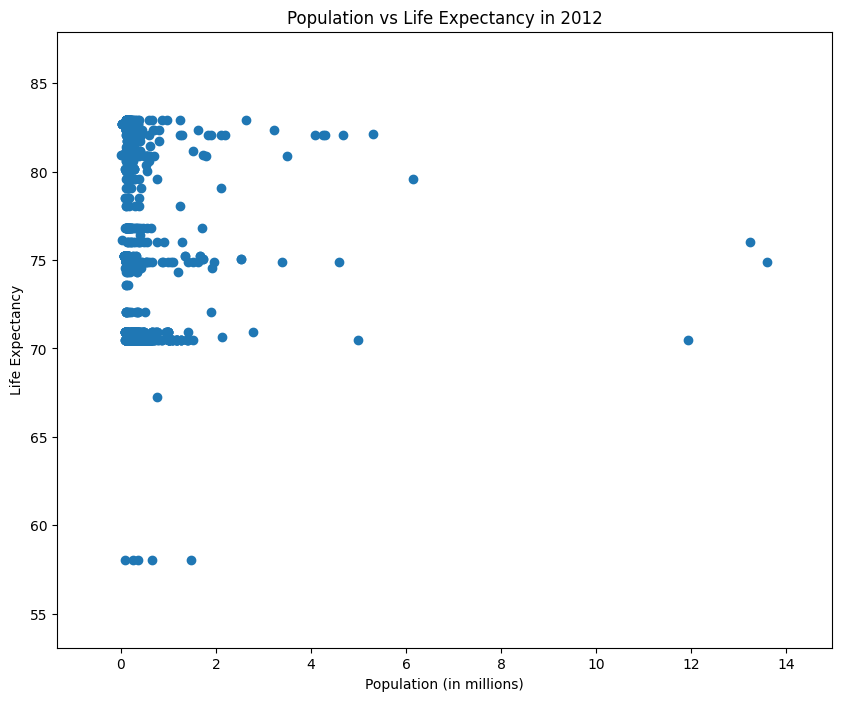

In [102]:
#from typing import Optional
import pylab
pylab.rcParams['figure.figsize'] = (10., 8.)

lifepop = cities.merge(life, left_on='Country or Area', right_on='Country or Area')
#lifepop = cities.merge(life, left_on='Country or Area', right_index=True)
lifepop = lifepop.set_index('City')
lifepop.rename(columns={'Value':'Population'}, inplace=True)
lifepop['Population']=lifepop['Population']/1000000
#lifepop.head()

plt.scatter(x=lifepop['Population'], y=lifepop['Life Expectancy'])
#plt.plot(x=lifepop['Population'], y=lifepop['Life Expectancy'], kind='scatter')
plt.title('Population vs Life Expectancy in 2012')
plt.xlabel('Population (in millions)')
plt.ylabel('Life Expectancy')
plt.margins(0.1, 0.2)

# a lot of data is missing from the merge as we can assume that there are many cities in countries which have a population somewhere roughly between 6 and 12 million that are not shown on the graph
